<h1> sales data analysis

Insights ;
1.what is the trendline in the overall sales for the year?
2.which products shell on the most ?
3.whomare the top customers ?

In [129]:
#import the libraraies which are needed .

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [55]:
#loading the excelfile
df = pd.read_excel("C:\\Users\\Ronald G Richards\\Downloads\\Online_Retail.xls.xlsx")

In [56]:
df.head(10) #To see the first 10 sets of the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [57]:
df.tail(10) #To see the last 10 sets of the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [58]:
df.info() #Basic information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [59]:
df.shape #To find the no of columns and rows

(541909, 8)

In [61]:
df.describe() #to find the arithimatic stutas of the dataset

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


<h3> EXPOLITARY DATA ANALYSIS

<h4>overallsales trend

In [62]:
df["InvoiceDate"].min() #to find the minimum invoice date

Timestamp('2010-12-01 08:26:00')

In [63]:
df['InvoiceDate'].max() #to find the maximum invoice date

Timestamp('2011-12-09 12:50:00')

In [64]:
df['sales']=df['Quantity']*df['UnitPrice'] #adding a column to know the overall sale of the product to the  customer
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [65]:
df["monthyear"]=df["InvoiceDate"].apply(lambda x: x.strftime('%Y-%m')) #to seperate the month and year colum from the invoice date column

In [66]:
df_temp = df.groupby('monthyear')['sales'].sum().reset_index()
#naming an another dataframe to manipulate the data to find the trend of the datset

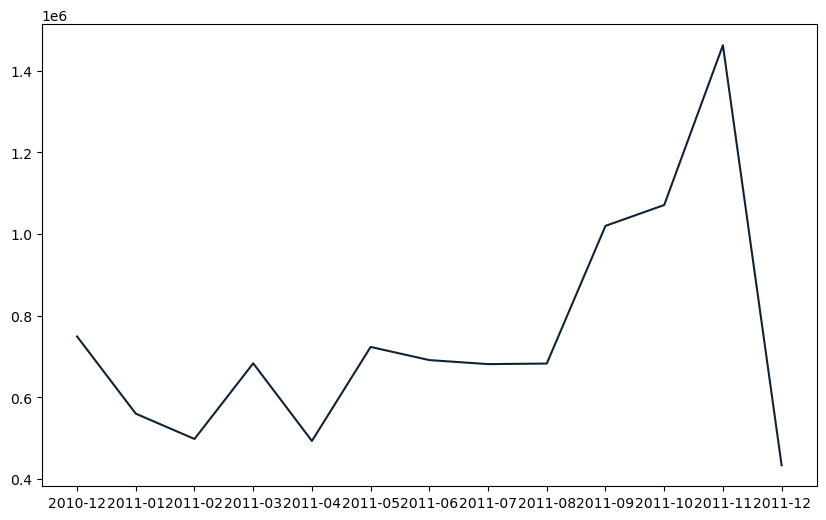

In [109]:
plt.figure(figsize=(10,6))
plt.plot(df_temp["monthyear"], df_temp["sales"], color="#112233",)
#to visuvalize the cureent dataset in the line daigram

 <h5>finding the top product sold in annual


In [68]:
product_sales = df.groupby('Description')['sales'].sum()
#to find the  top product sold in annual

In [69]:
sorted_sales= product_sales.sort_values(ascending=False)
#sorting the overall dataset into the needed form

In [71]:
top_products=sorted_sales.head(10)
#giving a seperate variable name for the simple visuvalization

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'DOTCOM POSTAGE'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(3, 0, 'PARTY BUNTING'),
  Text(4, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(5, 0, 'RABBIT NIGHT LIGHT'),
  Text(6, 0, 'POSTAGE'),
  Text(7, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(8, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(9, 0, 'CHILLI LIGHTS')])

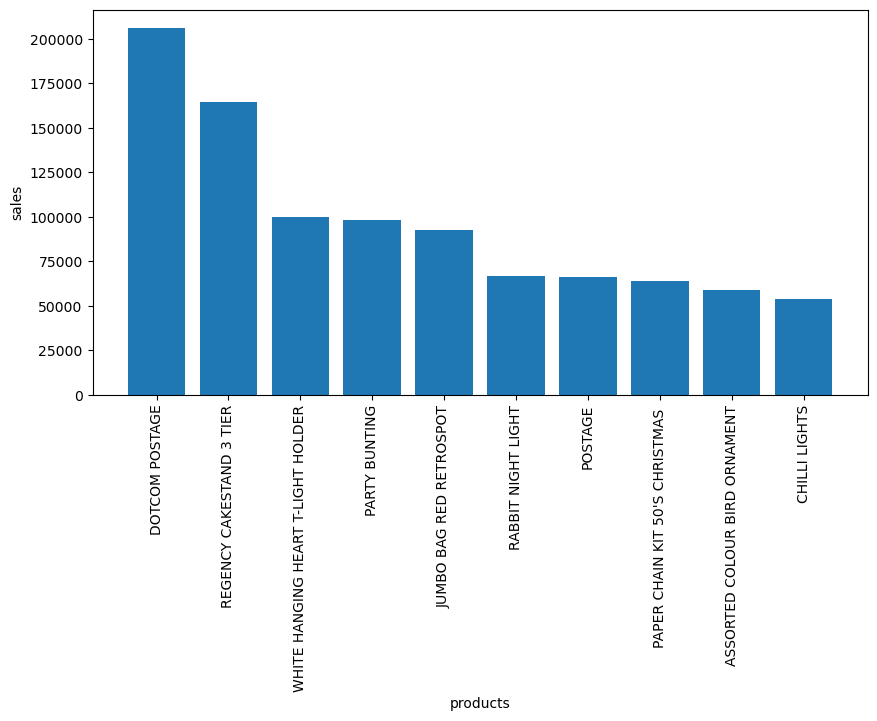

In [130]:
#to visuvalize the dataset 
plt.figure(figsize=(10,5))
plt.bar(top_products.index,top_products.values)
plt.xlabel('products')
plt.ylabel('sales')
plt.xticks(rotation=90)

<h6> To find which customer have bought for the highest price

In [150]:
#To find which customer have bought for the highest price
purchase_perc = df.groupby('CustomerID')['sales'].sum().reset_index()
#grouping them in terms of the customer id which is unique fir each one of them and addind the sales which they have brought througout thr yrae
purchase_perc = purchase_perc.sort_values(by='sales', ascending=False)
#sorting the dataset to our needed form
top_customers=purchase_perc.head(10).
#assing the seperste vairable to simple the vizuvalization

In [151]:
print(top_customers) # these are the top 10 customers

      CustomerID      sales
1703     14646.0  279489.02
4233     18102.0  256438.49
3758     17450.0  187482.17
1895     14911.0  132572.62
55       12415.0  123725.45
1345     14156.0  113384.14
3801     17511.0   88125.38
3202     16684.0   65892.08
1005     13694.0   62653.10
2192     15311.0   59419.34


Text(0.5, 1.0, 'Top Customers by Total Sales')

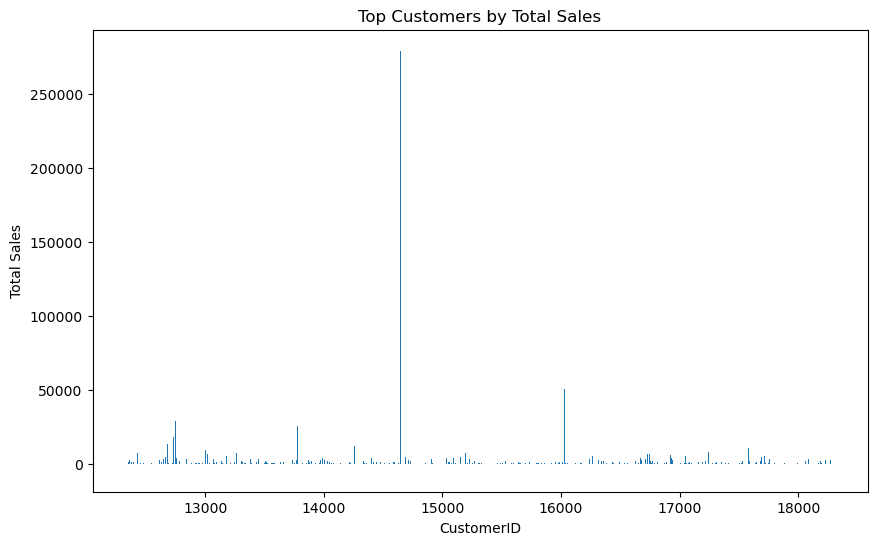

In [152]:
plt.figure(figsize=(10,6))
plt.bar(purchase_perc['CustomerID'],purchase_perc['sales'],)
plt.xlabel('CustomerID')
plt.ylabel('Total Sales')
plt.title('Top Customers by Total Sales')
to vizuvalize the dataset